In [1]:
!pip install git+https://github.com/UN-GCPDS/python-gcpds.utils.git > /dev/null

  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-fn9oqxwq


In [2]:
!pip install mne==0.19 > /dev/null

In [ ]:
import sys
sys.path.insert(0,'/kaggle/input/mi-eeg-classmeth/')

In [5]:
from gcpds.utils import loaddb
import sys
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
from joblib import dump, load
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedShuffleSplit,LeaveOneOut
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score, pairwise_distances
from mne.viz import plot_topomap
from MIfunctions import * #importar todas las funciones de manejo de eeg con mne.
import os
import time
from sklearn.metrics import make_scorer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pickle

The subject 26 has 5 runs
(40, 64, 1792)
(40,)
Fitting 40 folds for each of 12 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3

sbj26acc55.0
The subject 27 has 5 runs
(40, 64, 1792)
(40,)
Fitting 40 folds for each of 12 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | el

sbj27acc60.0
The subject 28 has 5 runs
(40, 64, 1792)
(40,)
Fitting 40 folds for each of 12 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3

sbj28acc55.0
The subject 30 has 5 runs
(40, 64, 1792)
(40,)
Fitting 40 folds for each of 12 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3

sbj30acc67.5
The subject 31 has 5 runs
(40, 64, 1792)
(40,)
Fitting 40 folds for each of 12 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3

sbj31acc62.5


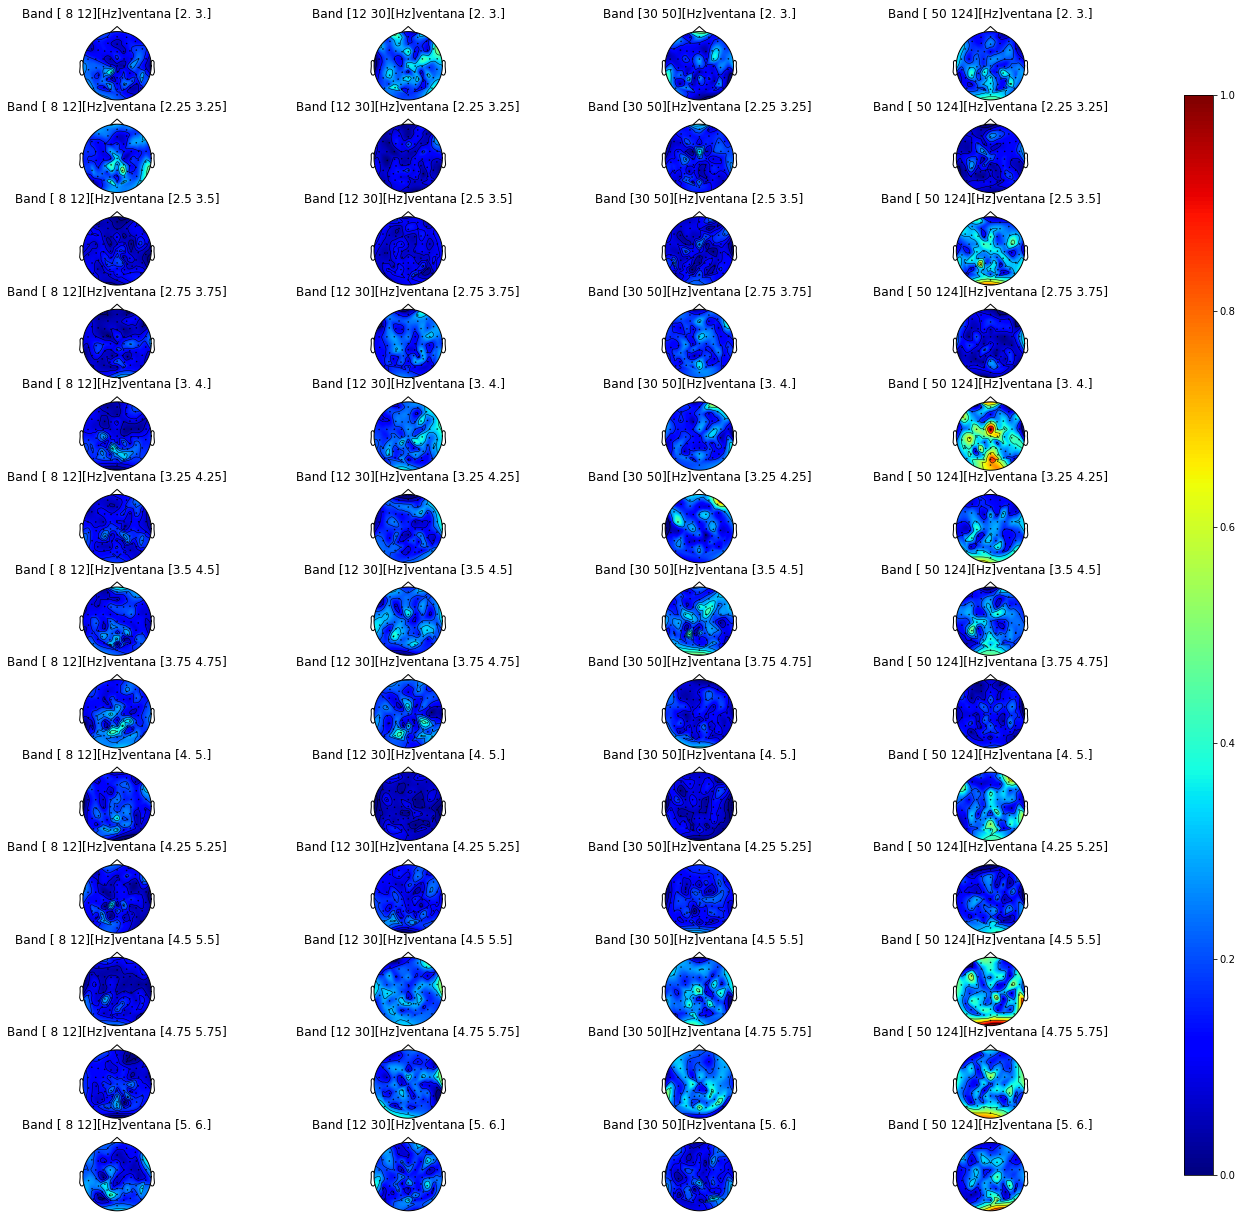

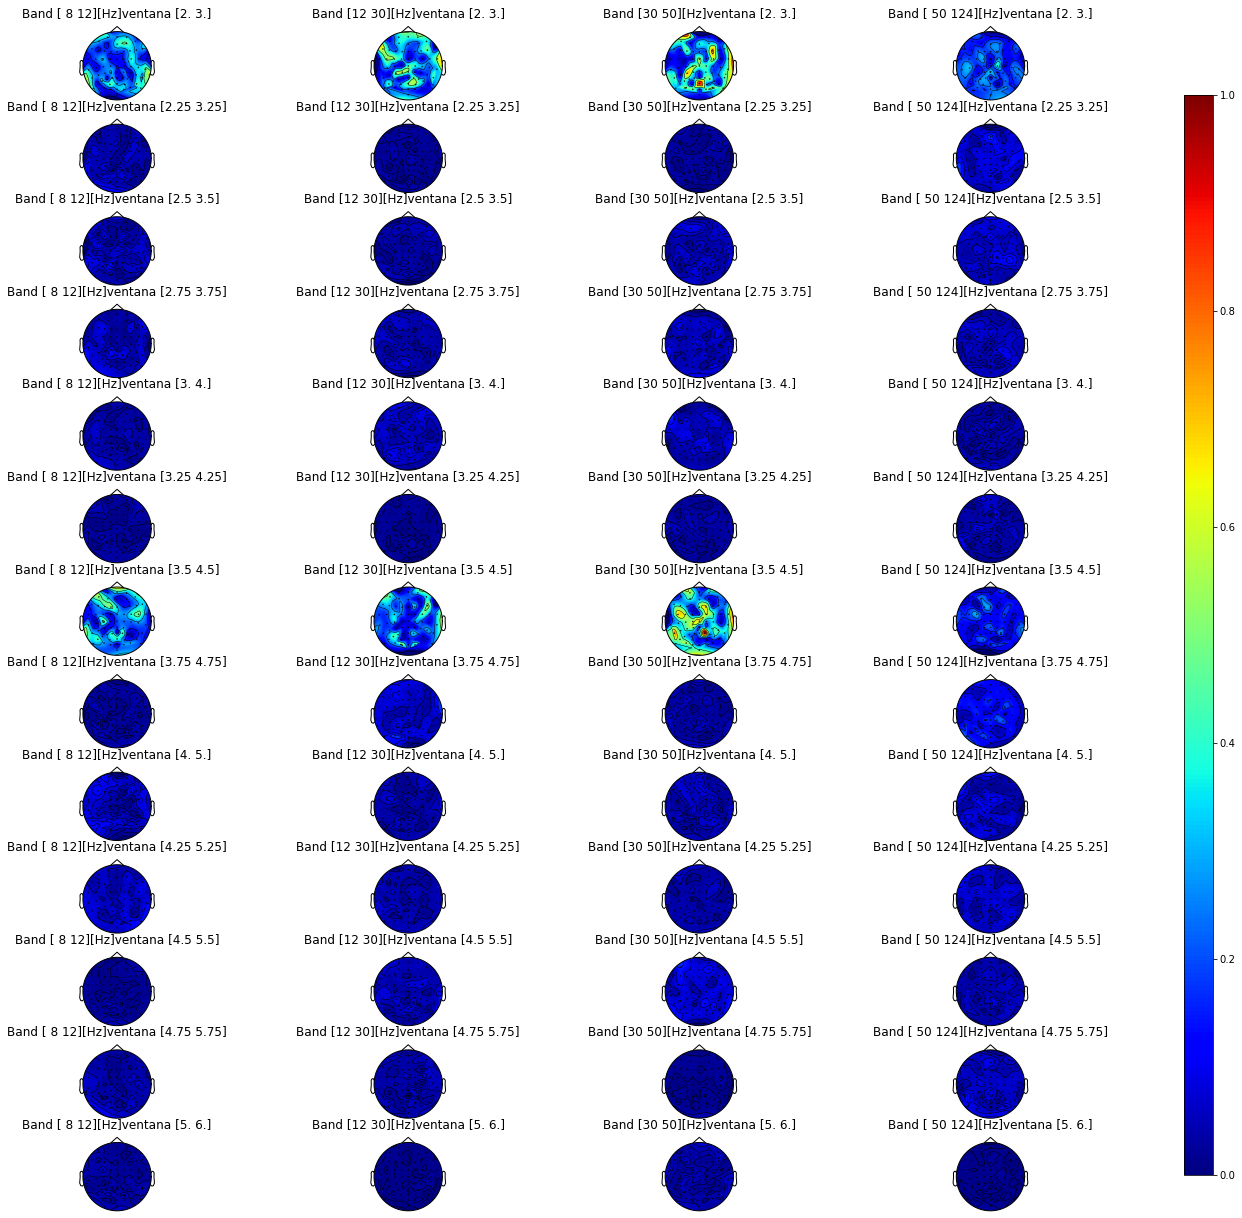

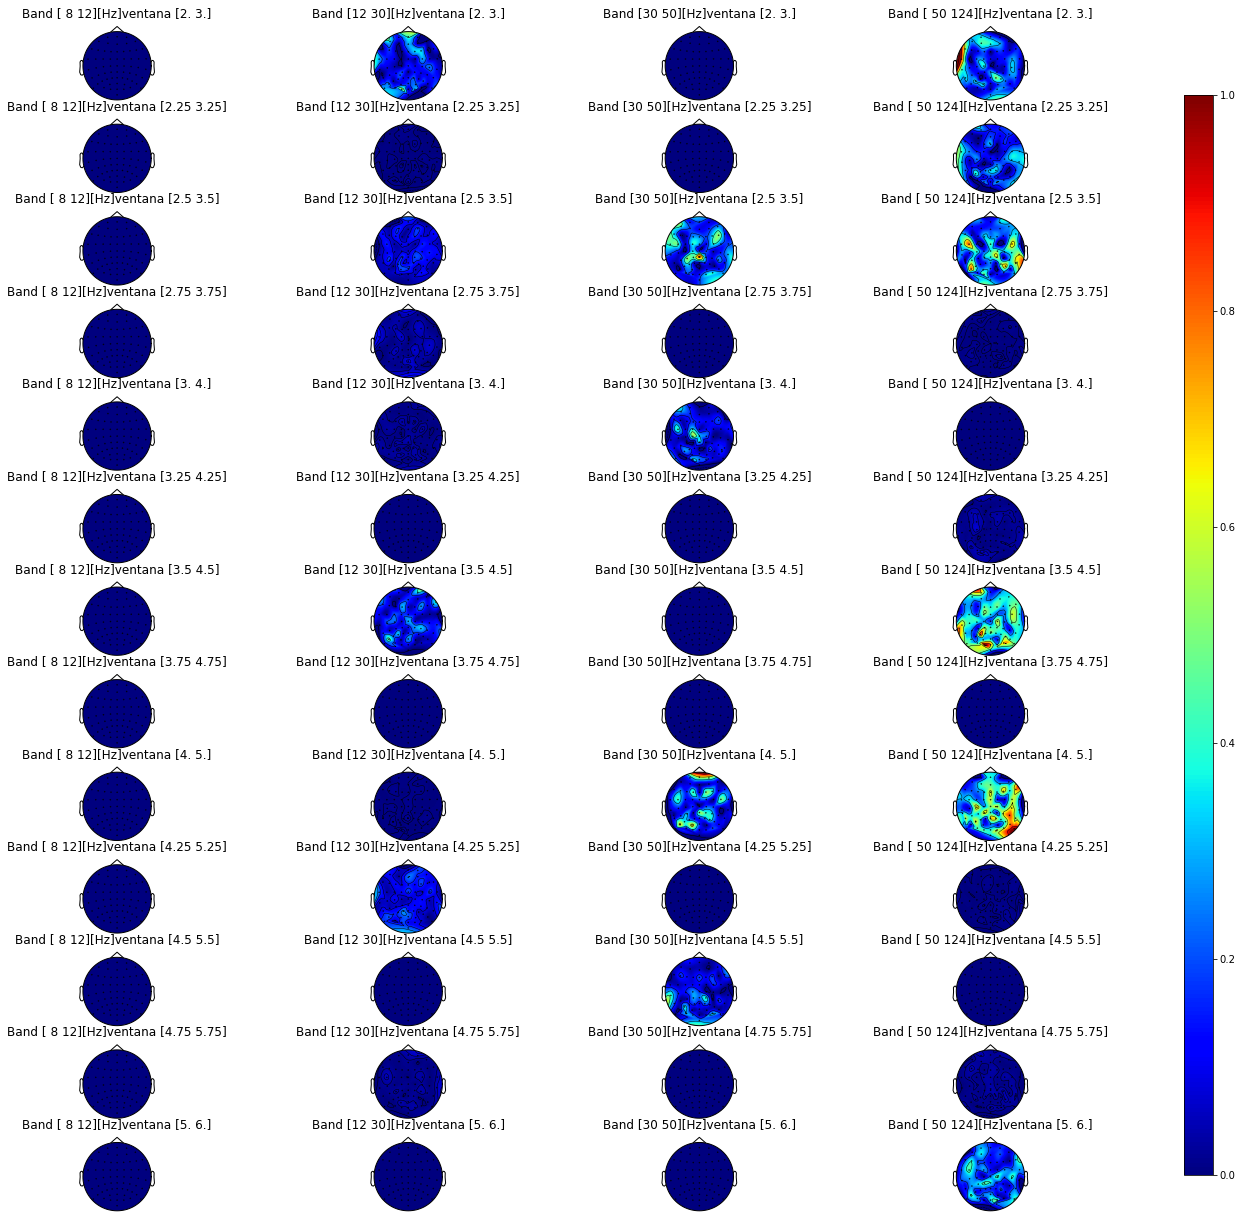

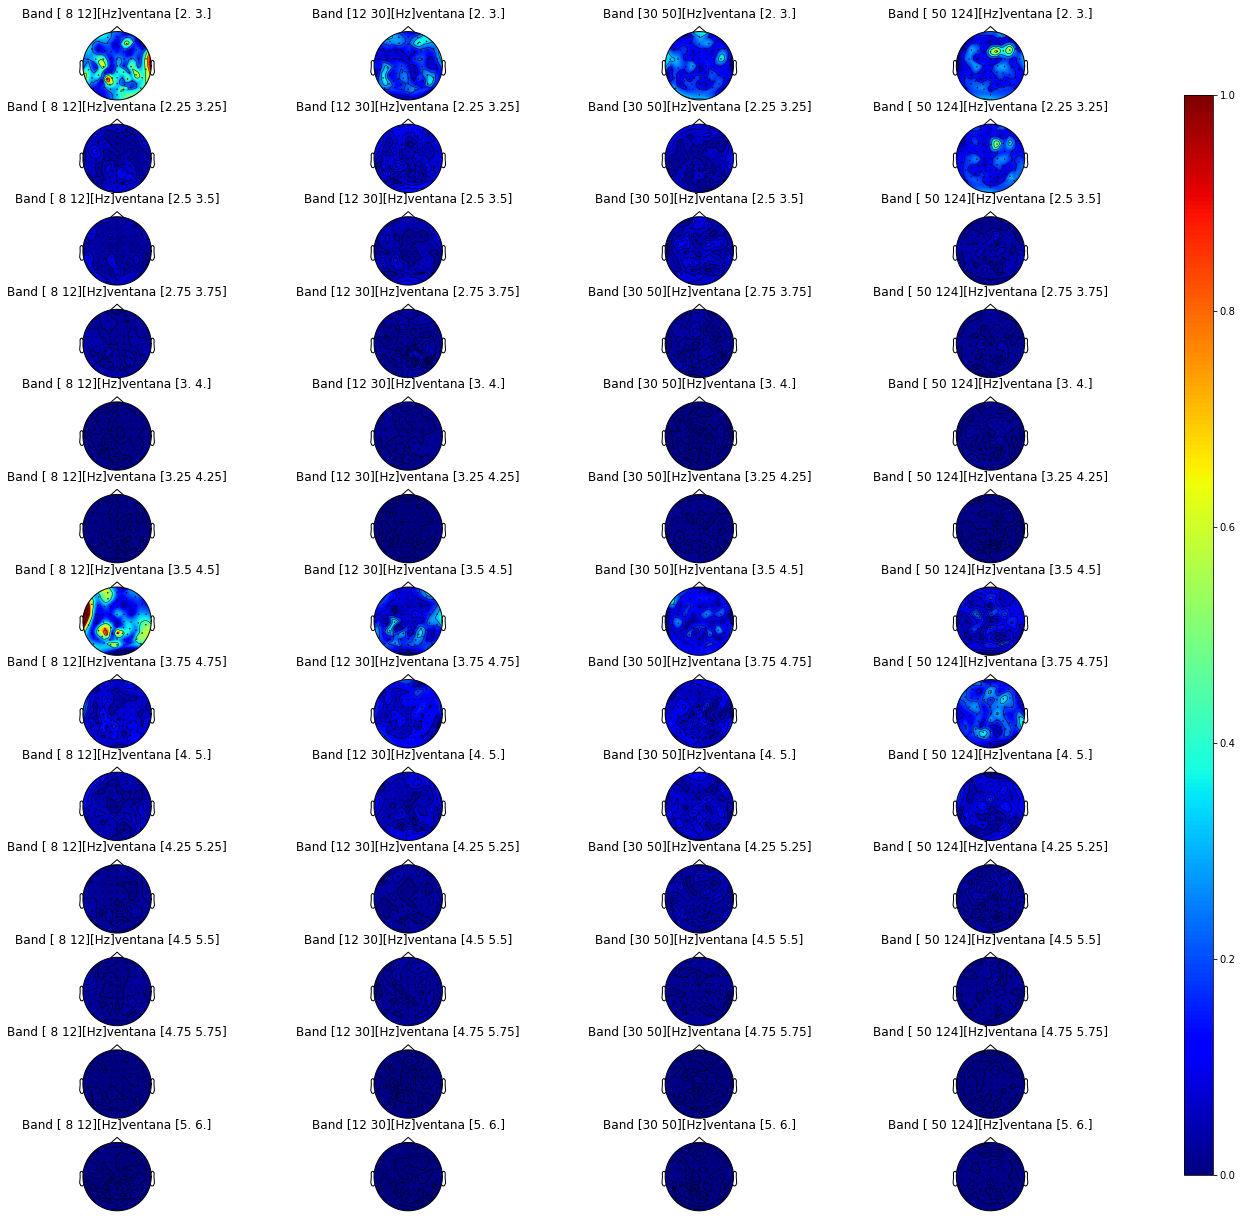

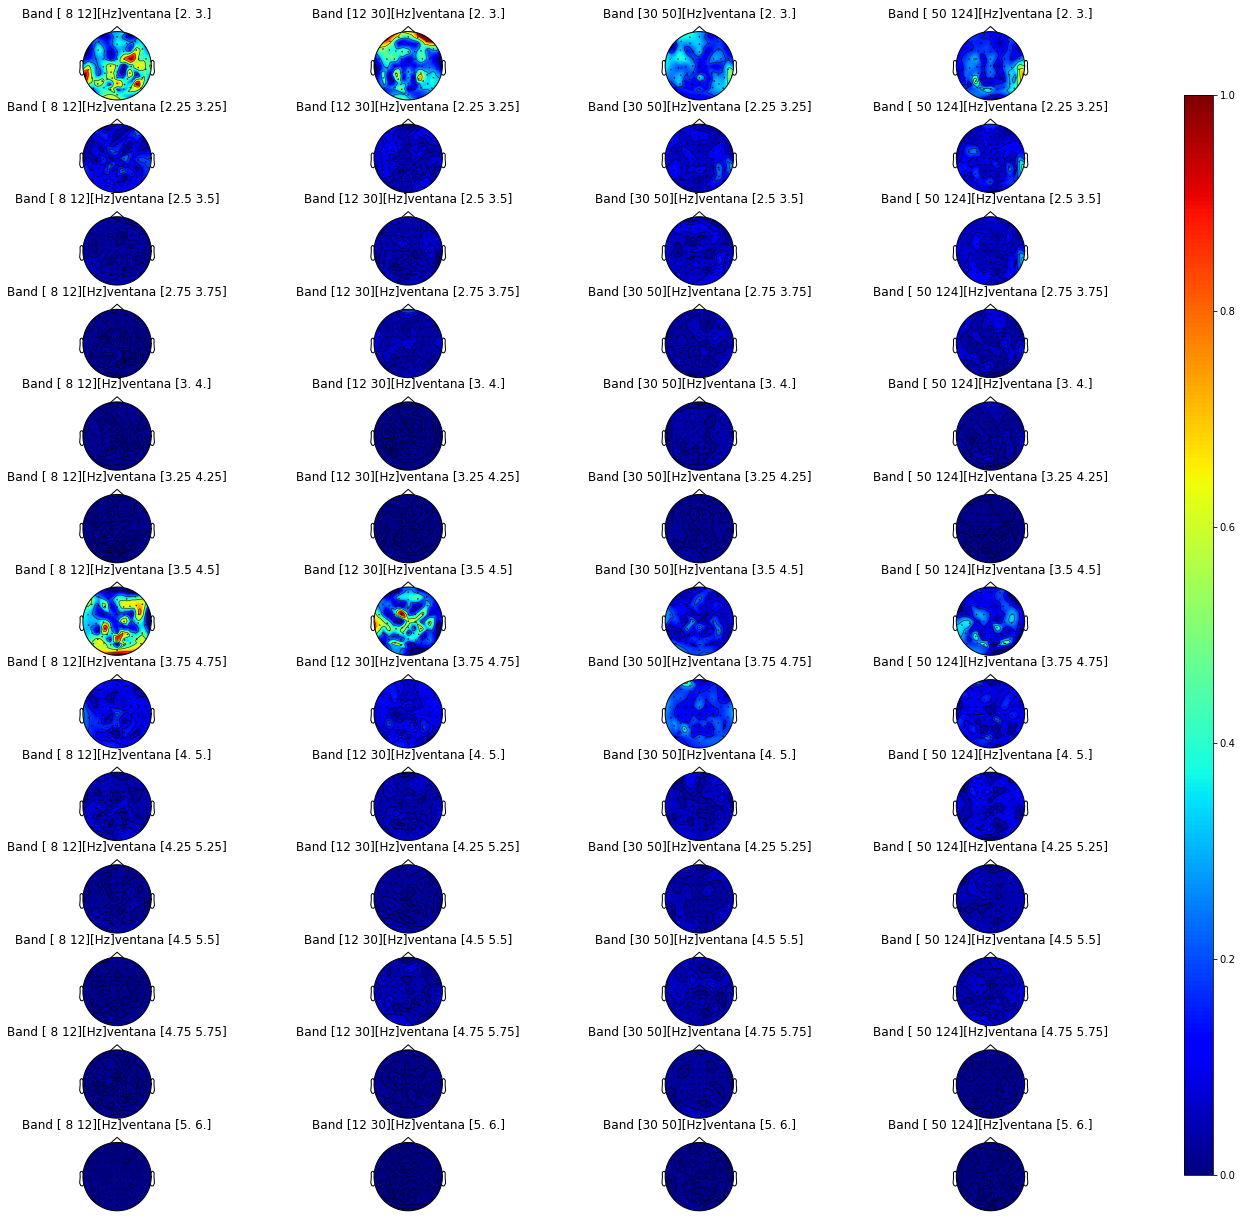

In [6]:
tau =  4
overlap=1-0.5
ti = 4
tf = 40
tti = np.arange(ti,tf-tau+(tau*overlap),tau*overlap)
ttf = np.arange(ti+tau,tf+tau*overlap,tau*overlap)
f_frec = np.array([tti,ttf]).T
f_frec =  np.array([[8,12],[12,30],[30,50],[50,124]])
#vtw= np.array([[0,2],[1,3],[2,4],[3,5],[4,6],[5,7]])
tau =  1
overlap=1-0.75
ti = 2
tf = 6
tti = np.arange(ti,tf-tau+(tau*overlap),tau*overlap)
ttf = np.arange(ti+tau,tf+tau*overlap,tau*overlap)
vtw = np.array([tti,ttf]).T
#vtw= np.array([[0,2]])
#f_frec = np.array([[2.5,4.5]])
subjects = np.arange(52)+1
subjects=np.delete(subjects,[28,33])
for sbj in subjects[25:30]:#subjects:
    db = loaddb.GIGA('../input/giga-science-gcpds/GIGA_MI_ME/')
    db.load_subject(sbj)
    print(f'The subject {sbj} has {db.runs} runs')
    Xraw, y = db.get_data(reject_bad_trials=True,classes=['left hand mi', 'right hand mi'])
    #run[i], class_[i] = db.get_run(i,classes=['left hand', 'right hand'])
    Xraw = np.asarray(Xraw)
    Xraw=Xraw[:,:,::2]
    print(Xraw.shape)
    y = np.asarray(y,dtype=np.float64).ravel()
    y[y==0]=-1
    print(y.shape)
    fs =db.metadata['sampling_rate']/2
    #fs =db.metadata['sampling_rate']
    channels_names = db.metadata['channel_names']
    montage = mne.channels.read_montage(db.metadata['montage'], channels_names)
    info = mne.create_info(channels_names, sfreq=fs, ch_types="eeg",
                            montage=montage) 
    feat = FB_feats(fs=fs,vtw=vtw,f_frec=f_frec,gammad=1,feat='PLV',n_cycles=5.0)
    xxx = feat.fit_transform(Xraw,y) 
    #opt = tf.keras.optimizers.RMSprop(learning_rate=1e-1)
    steps=[('CSP_window_time',Window_band_CSP_eppoch(fs=fs,vtw=vtw,f_frec=f_frec,PCov=True)),
            ('flat',flatt()),
            ('stand',StandardScaler()),
            ('proy',elastic_net_feats()),
            ('cla', LDA())]    
    method = Pipeline(steps,memory='/kaggle/tmp/datospipeline')
    parameters ={'CSP_window_time__ncomp':[6],
                 'proy__alpha':[0, 0.001, 0.1, 1], #0, 0.001, 0.1, 1
                'proy__l1_ratio':[0, 0.5, 1]} #[0, 0.5, 1]
    scores = {'acc': 'accuracy','kappa': make_scorer(cohen_kappa_score,greater_is_better=True)}    
    cv = LeaveOneOut()#StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    grid_search = GridSearchCV(method, parameters,cv=cv,verbose=10,
                               scoring=scores,refit='acc',n_jobs=-1)
    #grid_search = GridSearchCV(method, parameters,cv=cv,verbose=10,
     #                          scoring=kappa_,n_jobs=-1)
    #try:
    grid_search.fit(xxx,y)
    results = grid_search.cv_results_
    filters = grid_search.best_estimator_['CSP_window_time'].filters
    ncomp = grid_search.best_estimator_['CSP_window_time'].ncomp
    #%% topoplots
    elastic=grid_search.best_estimator_['proy']
    rho = abs(elastic.elatic.coef_)
    rho = rho.reshape((len(vtw),ncomp,-1))
    rhocka = np.zeros((len(vtw),len(f_frec),len(channels_names)))
    if np.logical_and(len(f_frec)>1,len(vtw)>1):
        for i in range(len(vtw)):
          for j in range(len(f_frec)):
            rhocka[i,j,:] =  np.sum(np.diag(np.abs(rho[i,:,j])).dot(np.abs(filters[i][:,:,j])),0)
        rhocka -= np.min(rhocka)
        rhocka /= np.max(rhocka)
        f,ax = plt.subplots(len(vtw),len(f_frec),figsize=(20,20))
        cmap='jet'
        for ii in range(len(vtw)):
          for jj in range(len(f_frec)):
              plot_topomap(rhocka[ii,jj,:], info, axes=ax[ii,jj], show=False,cmap=cmap,vmin=np.min(rhocka),vmax=np.max(rhocka))
              ax[ii,jj].set_title('Band '+str(f_frec[jj])+'[Hz]'+'ventana '+str(vtw[ii]))
        cax = f.add_axes([0.95, 0.15, 0.02, 0.75])
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        plt.colorbar(sm,cax=cax)
    elif np.logical_and(len(f_frec)>1,len(vtw)==1):
        for j in range(len(f_frec)):
          rhocka[0,j,:] =  np.sum(np.diag(np.abs(rho[0,:,j])).dot(np.abs(filters[0][:,:,j])),0)
        rhocka=rhocka.squeeze()
        rhocka -= np.min(rhocka)
        rhocka /= np.max(rhocka)
        f,ax = plt.subplots(len(f_frec),1,figsize=(20,20))
        cmap='jet'
        for jj in range(len(f_frec)):
            plot_topomap(rhocka[jj,:], info, axes=ax[jj], show=False,cmap=cmap,vmin=np.min(rhocka),vmax=np.max(rhocka))
            ax[jj].set_title('Band '+str(f_frec[jj])+'[Hz]'+'ventana '+str(vtw))
        cax = f.add_axes([0.95, 0.15, 0.02, 0.75])
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        plt.colorbar(sm,cax=cax)  
    else:
        for i in range(len(vtw)):
            rhocka[i,:] =  np.sum(np.diag(np.abs(rho[i,:,0])).dot(np.abs(filters[i][:,:,0])),0)
        rhocka -= np.min(rhocka)
        rhocka /= np.max(rhocka)
        f,ax = plt.subplots(len(vtw),1,figsize=(20,20))
        cmap='jet'
        for ii in range(len(vtw)):
              plot_topomap(rhocka[ii,0,:], info, axes=ax[ii], show=False,cmap=cmap,vmin=np.min(rhocka),vmax=np.max(rhocka))
              ax[ii].set_title(str(f_frec[0])+'Hz'+str(vtw[ii])+'seg')
        cax = f.add_axes([0.95, 0.15, 0.02, 0.75])
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        plt.colorbar(sm,cax=cax)   
    plt.savefig('csp_elastic_sbj'+str(sbj)+'acc'+str(np.round(grid_search.best_score_,2))+'.eps',format='eps')#,dpi=300)
    #plt.savefig('sbj'+str(sbj)+'kappa'+str(np.round(grid_search.best_score_,2))+'.png',format='png')#,dpi=300)
    savedata ={
        'steps':steps,
        'f_frec':f_frec,
        'vtw':vtw,
        'best_param':grid_search.best_params_,
        'rhocka':rhocka,        
        'cv_results':results
    }
    #dump(savedata,'sujeto_'+str(sbj)+'_cka_featuresCSP_BCI2a_acc.joblib')
    dump(savedata,'tau_'+str(tau)+'_sujeto_'+str(sbj)+'_elastic_featuresCSP_GIGA_ME_acc.joblib')
    print('sbj'+str(sbj)+'acc'+str(np.round(grid_search.best_score_*100,4)))

In [7]:
!zip Results-joblib.zip ./*.joblib
!zip Results-images.zip ./*.eps

  adding: tau_1_sujeto_26_elastic_featuresCSP_GIGA_ME_acc.joblib (deflated 34%)
  adding: tau_1_sujeto_27_elastic_featuresCSP_GIGA_ME_acc.joblib (deflated 33%)
  adding: tau_1_sujeto_28_elastic_featuresCSP_GIGA_ME_acc.joblib (deflated 66%)
  adding: tau_1_sujeto_30_elastic_featuresCSP_GIGA_ME_acc.joblib (deflated 33%)
  adding: tau_1_sujeto_31_elastic_featuresCSP_GIGA_ME_acc.joblib (deflated 33%)
  adding: csp_elastic_sbj26acc0.55.eps (deflated 79%)
  adding: csp_elastic_sbj27acc0.6.eps (deflated 81%)
  adding: csp_elastic_sbj28acc0.55.eps (deflated 86%)
  adding: csp_elastic_sbj30acc0.68.eps (deflated 82%)
  adding: csp_elastic_sbj31acc0.62.eps (deflated 82%)
